<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_Week4_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Problem 1] Confirmation of competition contents

# Introductory Machine Learning Class assignment and Learning Credit Information




*   Dataset contains a variety of alternative information about customers (telco, transactional info, etc.), and we have to create a model for learning and predicting client's repayment abilities.
*   Create csv submission file containing **SK_ID_CURR & TARGET** headers.
*   Evaluation metric: Receiver Operating Characteristic Area Under the Curve (ROC AUC).



## [Problem 2] Learning and verification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("sample_data/application_train.csv", index_col='SK_ID_CURR')
df = data.drop("TARGET", axis=1)
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print("Training data shape:", df.shape)

Training data shape: (307511, 120)


['NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR' 'FLAG_OWN_REALTY'
 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT' 'AMT_ANNUITY'
 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOORSMAX_AVG' 'FLOORSMIN_A

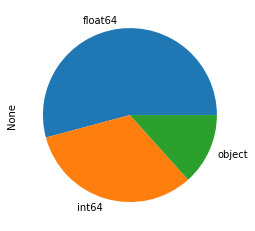

In [4]:
print(df.columns.values)
df.dtypes.value_counts().plot.pie()
plt.show()

In [5]:
# Check missing value ratios
pd.set_option('display.max_row', 122)
pd.set_option('display.max_column', 122)

missing_ratio = (df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)
missing_df = missing_ratio.to_frame(name="missing_ratio")
missing_df["dtype"] = [df[col].dtype for col in missing_df.index]
print(missing_df)

                              missing_ratio    dtype
COMMONAREA_MEDI                   69.872297  float64
COMMONAREA_AVG                    69.872297  float64
COMMONAREA_MODE                   69.872297  float64
NONLIVINGAPARTMENTS_MODE          69.432963  float64
NONLIVINGAPARTMENTS_MEDI          69.432963  float64
NONLIVINGAPARTMENTS_AVG           69.432963  float64
FONDKAPREMONT_MODE                68.386172   object
LIVINGAPARTMENTS_MEDI             68.354953  float64
LIVINGAPARTMENTS_MODE             68.354953  float64
LIVINGAPARTMENTS_AVG              68.354953  float64
FLOORSMIN_AVG                     67.848630  float64
FLOORSMIN_MEDI                    67.848630  float64
FLOORSMIN_MODE                    67.848630  float64
YEARS_BUILD_MEDI                  66.497784  float64
YEARS_BUILD_MODE                  66.497784  float64
YEARS_BUILD_AVG                   66.497784  float64
OWN_CAR_AGE                       65.990810  float64
LANDAREA_AVG                      59.376738  f

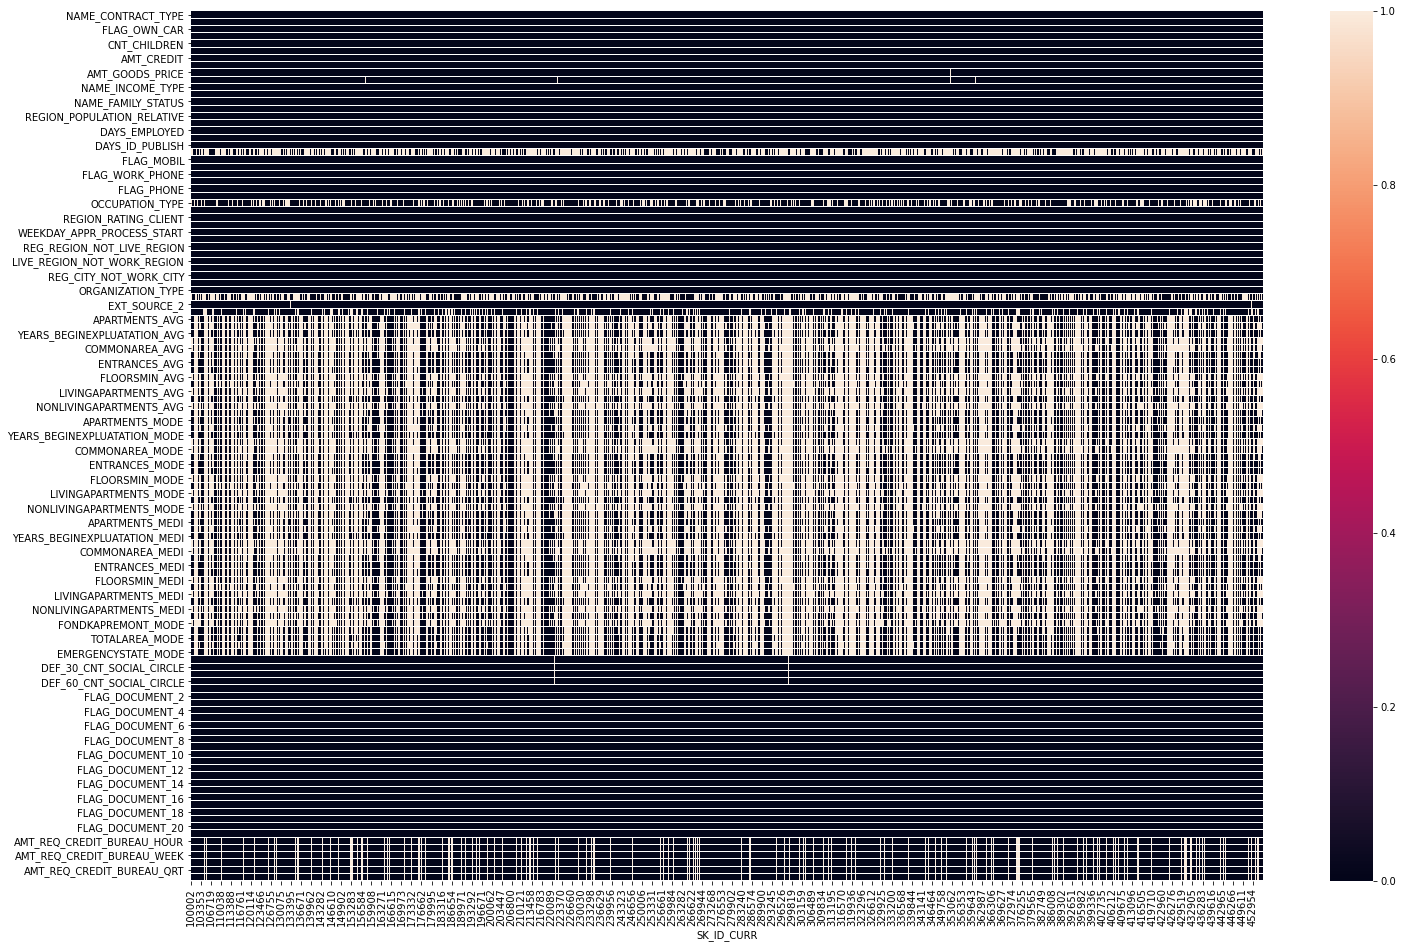

In [6]:
# Show heatmap of missing value amount
plt.figure(figsize=(24, 16))
sns.heatmap(df.isna().T)
plt.show()

In [7]:
# Training set imbalance
data['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

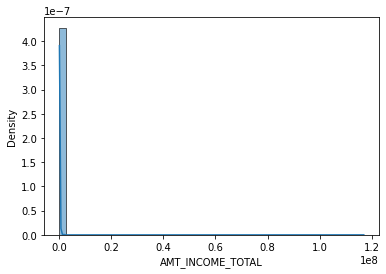

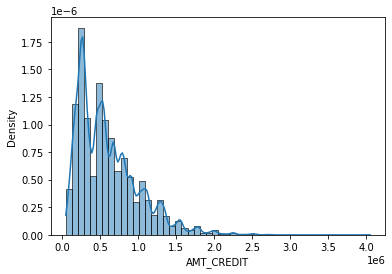

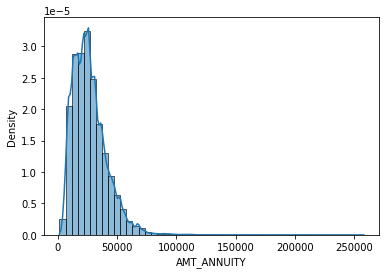

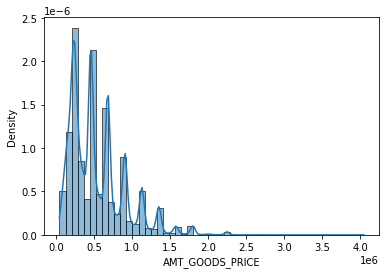

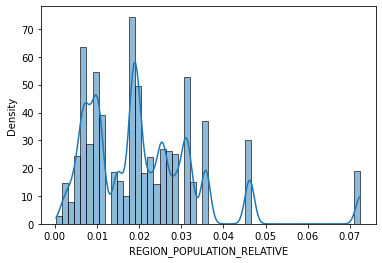

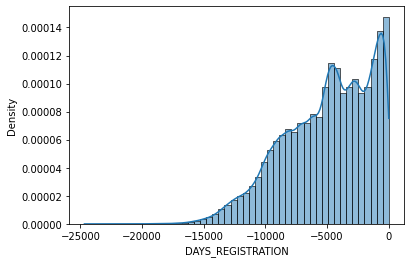

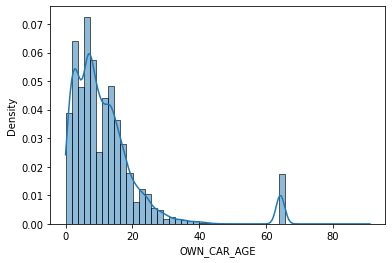

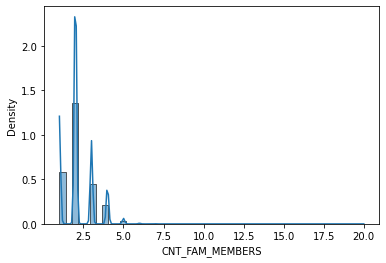

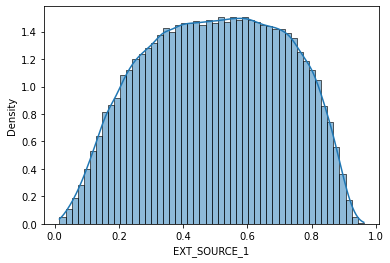

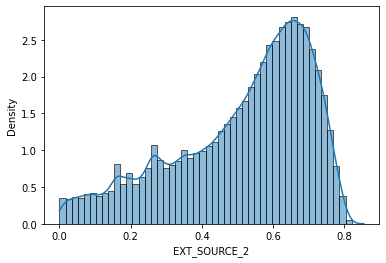

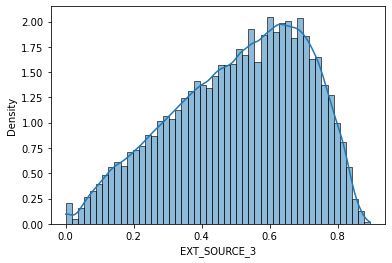

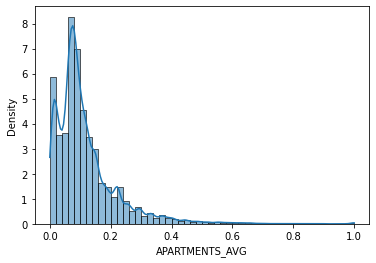

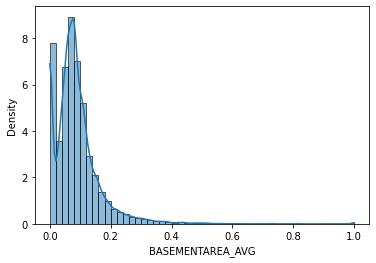

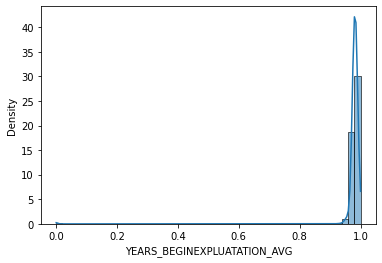

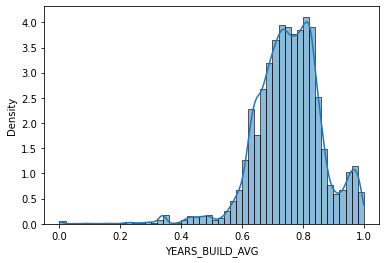

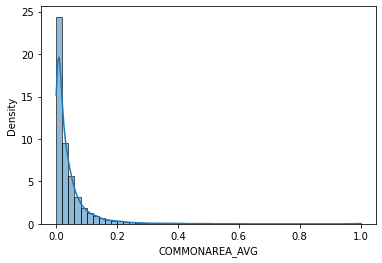

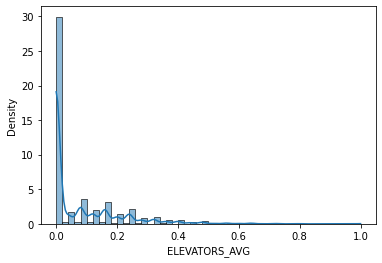

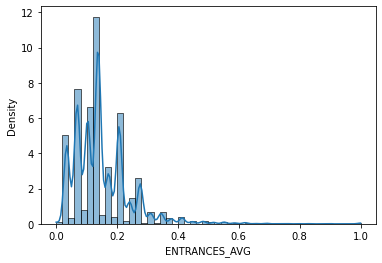

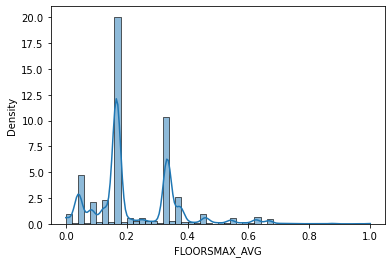

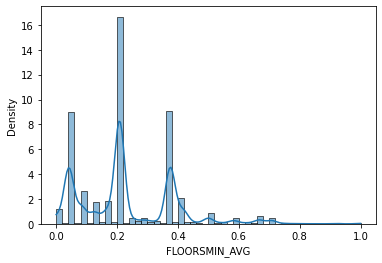

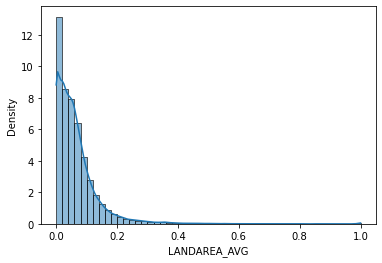

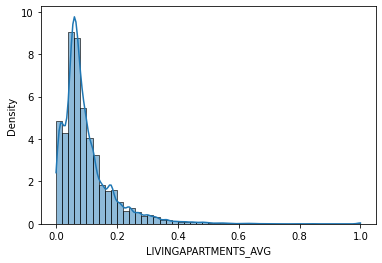

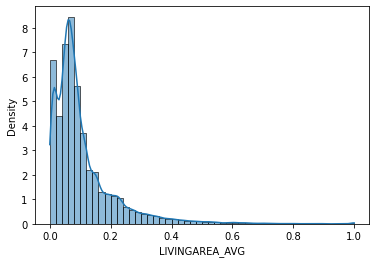

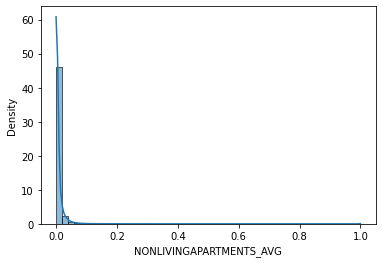

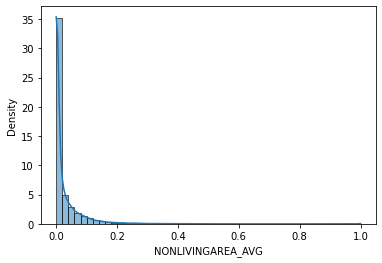

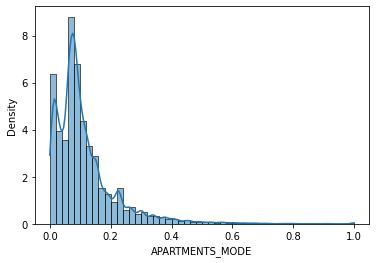

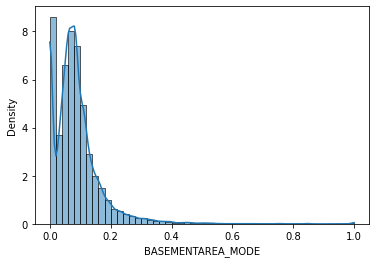

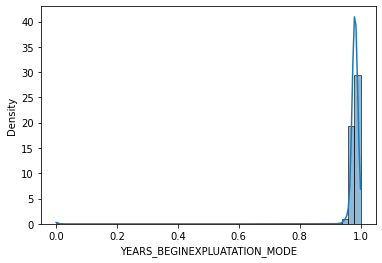

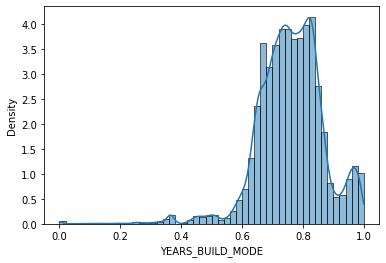

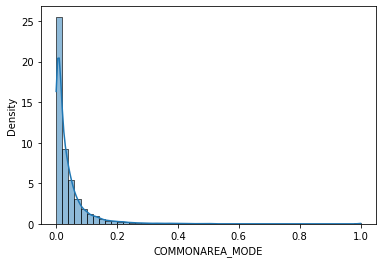

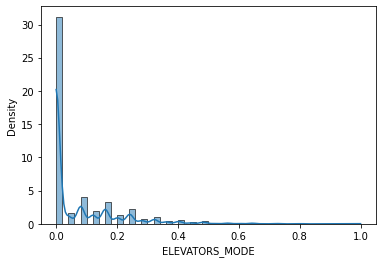

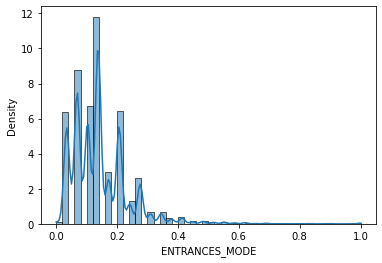

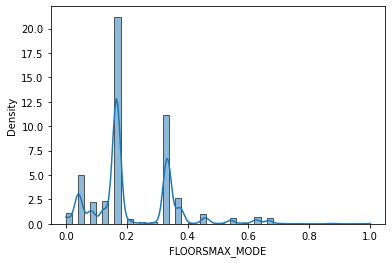

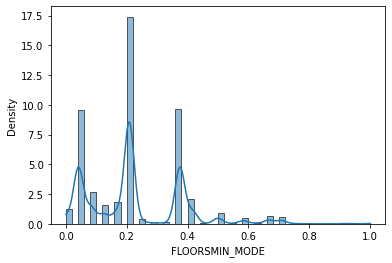

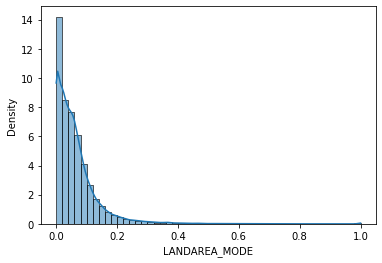

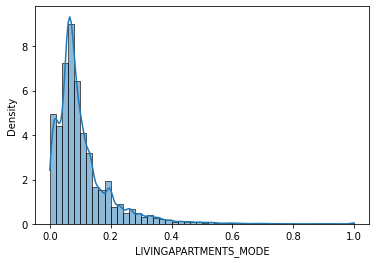

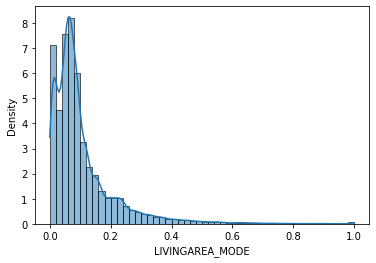

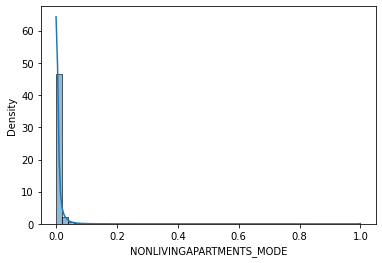

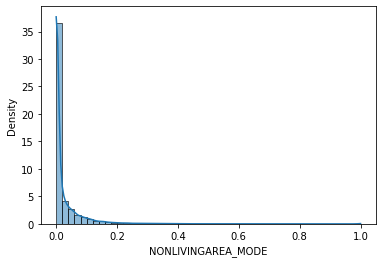

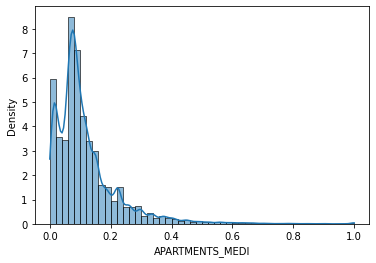

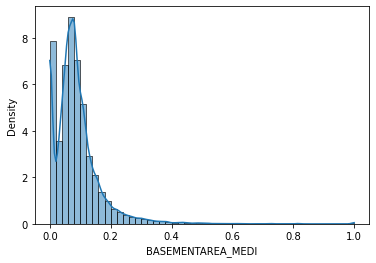

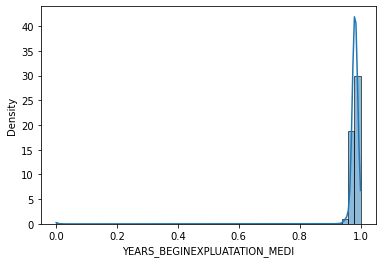

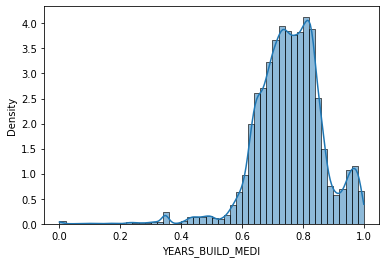

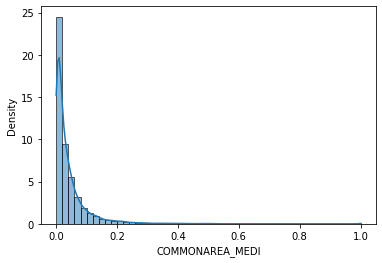

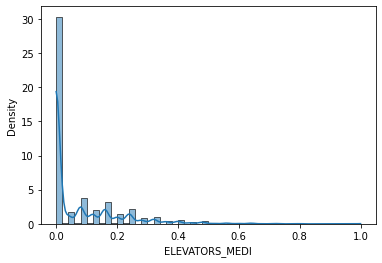

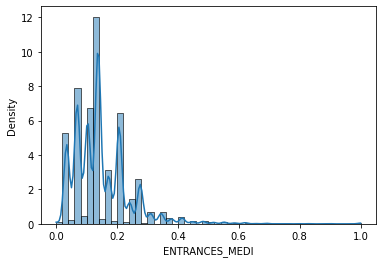

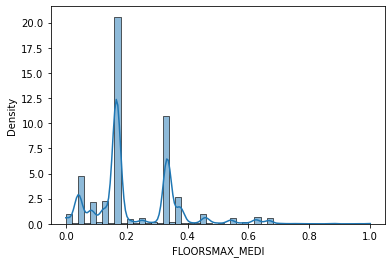

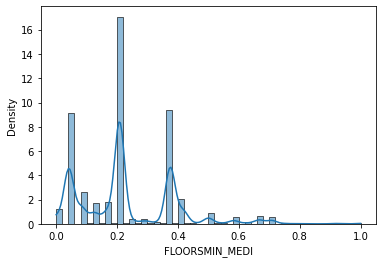

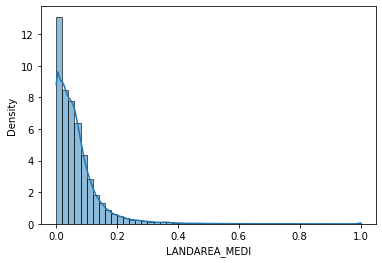

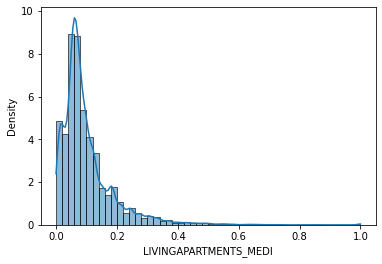

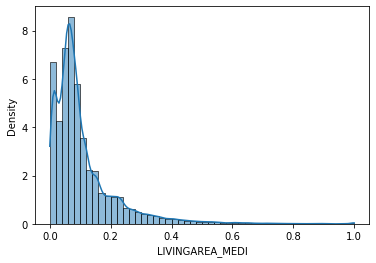

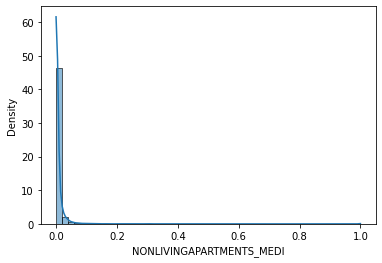

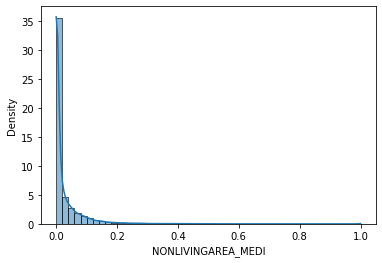

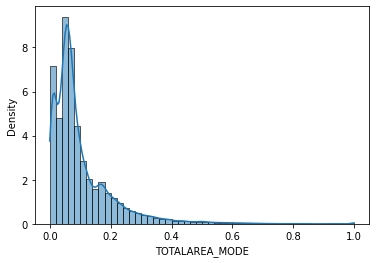

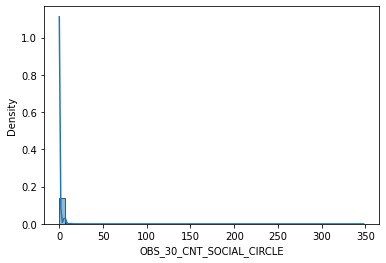

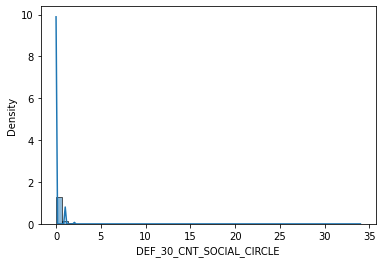

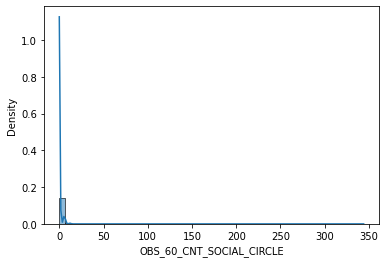

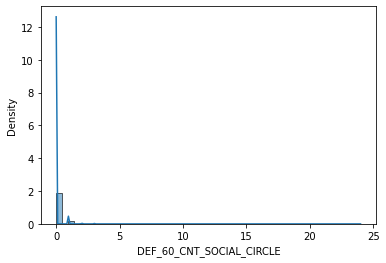

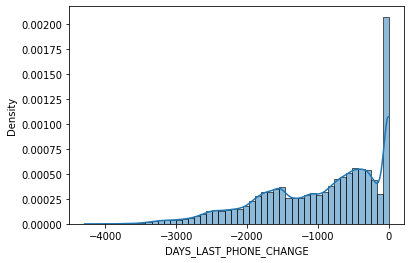

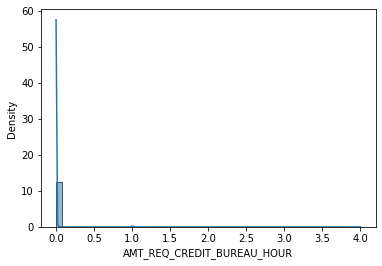

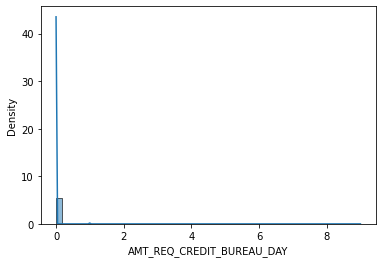

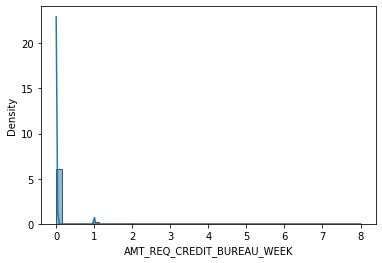

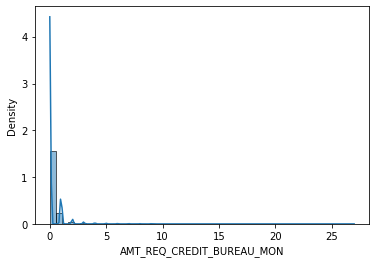

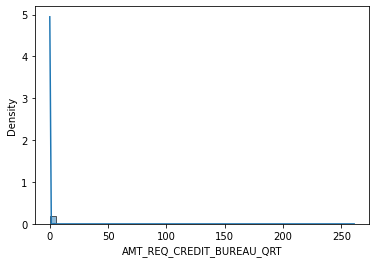

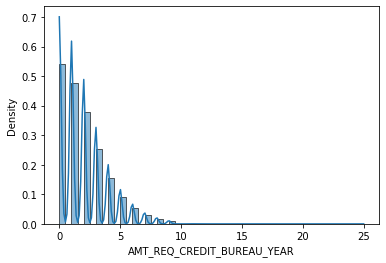

In [8]:
# Check continuous data columns
for col in df.select_dtypes(include='float'):
    plt.figure()
    sns.histplot(data=df, x=col, bins=50, stat='density', kde=True)
    plt.show()

In [9]:
# Check discrete data columns
for col in df.select_dtypes(include='int'):
    print(f"{col:-<50}: {df[col].nunique()}")

CNT_CHILDREN--------------------------------------: 15
DAYS_BIRTH----------------------------------------: 17460
DAYS_EMPLOYED-------------------------------------: 12574
DAYS_ID_PUBLISH-----------------------------------: 6168
FLAG_MOBIL----------------------------------------: 2
FLAG_EMP_PHONE------------------------------------: 2
FLAG_WORK_PHONE-----------------------------------: 2
FLAG_CONT_MOBILE----------------------------------: 2
FLAG_PHONE----------------------------------------: 2
FLAG_EMAIL----------------------------------------: 2
REGION_RATING_CLIENT------------------------------: 3
REGION_RATING_CLIENT_W_CITY-----------------------: 3
HOUR_APPR_PROCESS_START---------------------------: 24
REG_REGION_NOT_LIVE_REGION------------------------: 2
REG_REGION_NOT_WORK_REGION------------------------: 2
LIVE_REGION_NOT_WORK_REGION-----------------------: 2
REG_CITY_NOT_LIVE_CITY----------------------------: 2
REG_CITY_NOT_WORK_CITY----------------------------: 2
LIVE_CITY_NOT_W

Column selectors

In [10]:
discrete_cols = df.select_dtypes(include='int').columns.tolist()

# Bring high cordinality columns to numerical pipeline
numerical_cols = df.select_dtypes(include='float').columns.tolist() \
                    + [col for col in discrete_cols if df[col].nunique() >= 30]
low_card_discrete_cols = [col for col in discrete_cols if df[col].nunique() < 30]
categorical_cols = df.select_dtypes(include='object').columns.tolist()

Create baseline model

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Column preprocessing
numerical_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                   StandardScaler())
low_card_discrete_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"))
categorical_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                                     OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_cols),
                                       (SimpleImputer(strategy="most_frequent"), low_card_discrete_cols),
                                       (categorical_pipeline, categorical_cols))

In [12]:
from sklearn.model_selection import train_test_split

X, y = data.drop('TARGET', axis=1), data['TARGET']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(230633, 120) (76878, 120) (230633,) (76878,)


In [13]:
model = make_pipeline(preprocessor, SGDClassifier(loss='log', random_state=0))
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.9168162543250344

ROC score: 0.7388291090877552


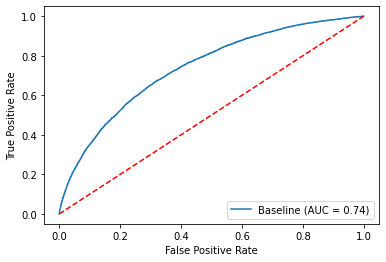

In [14]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

y_score = model.predict_proba(X_val)
score = roc_auc_score(y_val, y_score[:,1])
print("ROC score:", score)
plot_roc_curve(model, X_val, y_val, drop_intermediate=False, name="Baseline")
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.show()

## [Problem 3] Estimate for test data

In [15]:
df_test = pd.read_csv("sample_data/application_test.csv", index_col='SK_ID_CURR')

preds_test = model.predict(df_test)
output_df = pd.DataFrame({"SK_ID_CURR": df_test.index,
                          "TARGET": preds_test})
print(output_df.head())

   SK_ID_CURR  TARGET
0      100001       0
1      100005       0
2      100013       0
3      100028       0
4      100038       0


## [Problem 4] Feature engineering

Manually choose feature:
From the **missing_df** there are many group of 3 features with same missing ratio and prefix term, for example: **LIVINGAREA_MEDI**, **LIVINGAREA_MODE**, **LIVINGAREA_AVG**. Let's see how they correlate to each other.

In [16]:
# missing_df is sorted by missing_ratio
col_groups = []
group = []
for col in missing_df.index:
    if len(col_groups) == 0 or missing_df.loc[col, "missing_ratio"] <= 0.0001:
        col_groups.append([col])
        continue
    diff = abs(missing_df.loc[col_groups[-1][-1], "missing_ratio"] - missing_df.loc[col, "missing_ratio"])
    if diff <= 0.00001:
        col_groups[-1].append(col)
    else:
        col_groups.append([col])

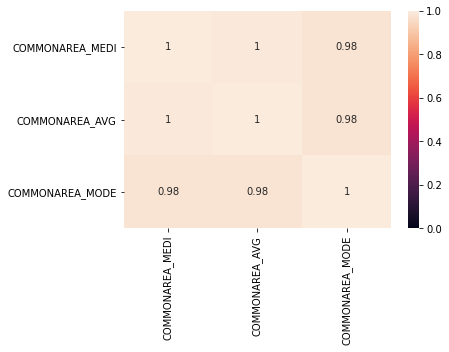

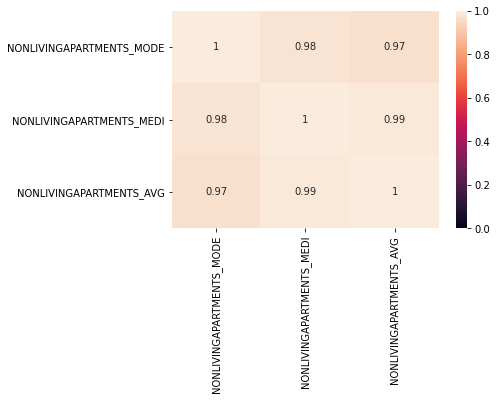

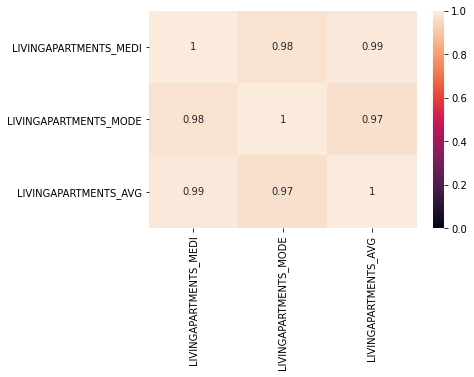

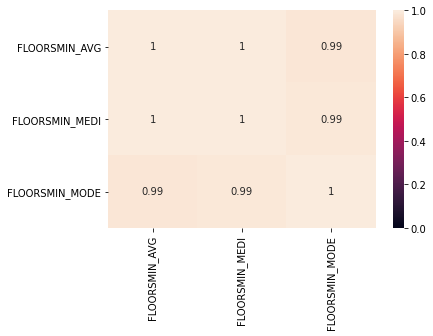

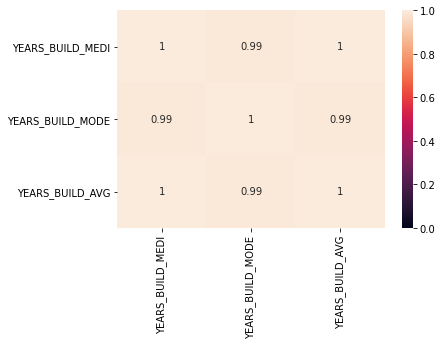

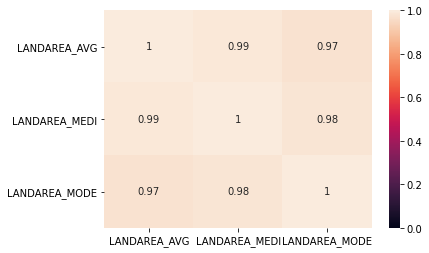

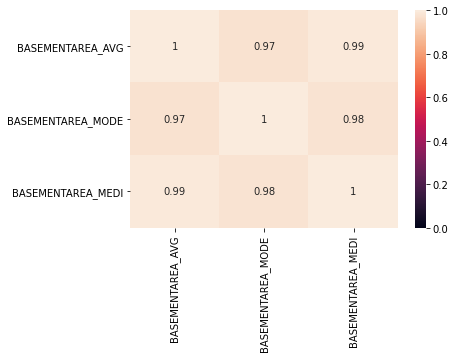

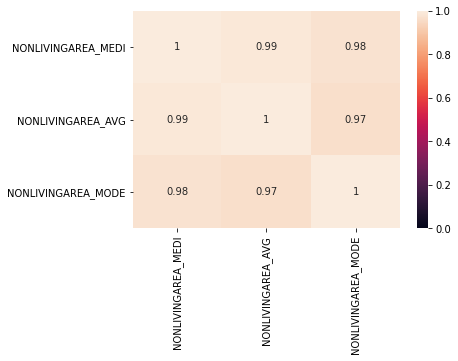

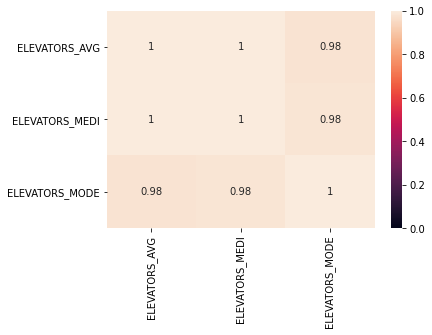

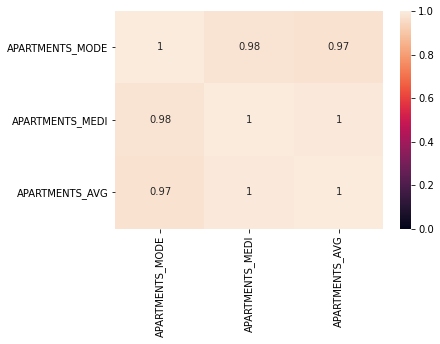

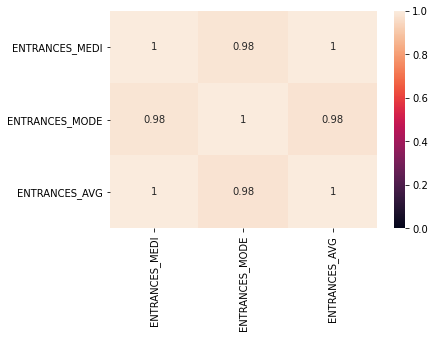

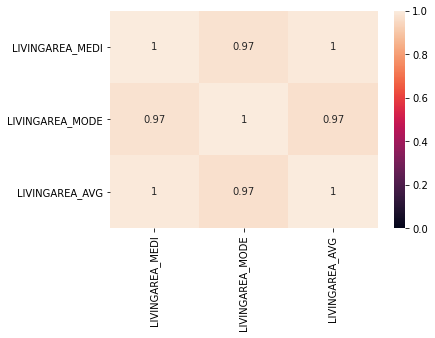

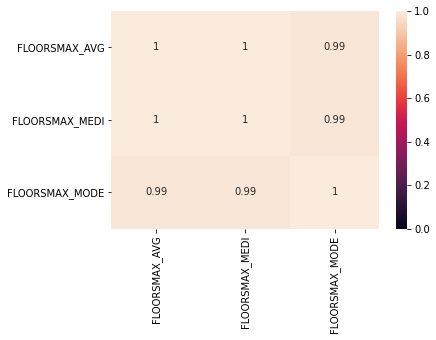

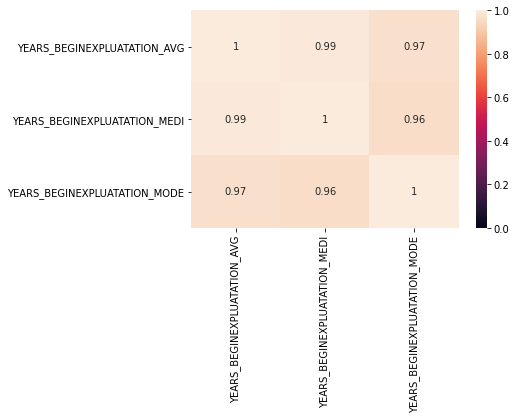

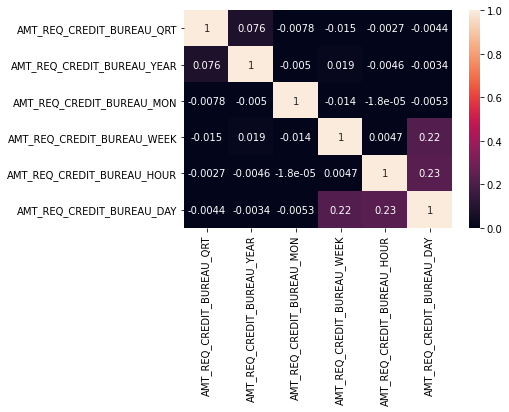

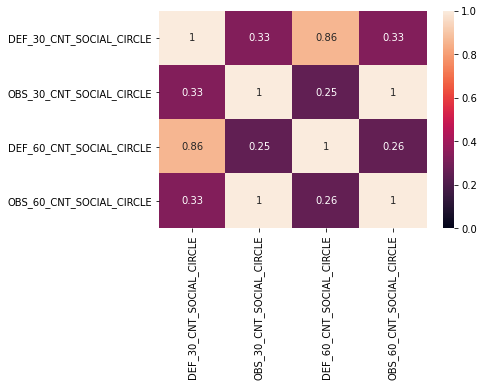

In [17]:
for group in col_groups:
    if len(group) > 1:        
        sns.heatmap(data[group].corr(), annot=True, vmin=0)
        plt.show()

It's shown that group of features with postfix (MODE, MEDI, AVG) is highly correlated. We can choose 1 column on behalf of a group to compress training features in order for faster training process.

In [18]:
compress_able_cols = [group for group in col_groups if len(group) == 3]
compress_cols = [group[0] for group in compress_able_cols]

In [19]:
def split_cols(df, cols):
    discrete_cols = df[cols].select_dtypes(include='int').columns.tolist()

    # Bring high cordinality columns to numerical pipeline
    numerical_cols = df[cols].select_dtypes(include='float').columns.tolist() \
                        + [col for col in discrete_cols if df[col].nunique() >= 30]
    low_card_discrete_cols = [col for col in discrete_cols if df[col].nunique() < 30]
    categorical_cols = df[cols].select_dtypes(include='object').columns.tolist()
    return numerical_cols, low_card_discrete_cols, categorical_cols

In [20]:
flatten_list = [col for cols in compress_able_cols for col in cols]
selected_cols = [col for col in df.columns if col not in flatten_list] + compress_cols

num_cols, low_cols, cat_cols = split_cols(df, selected_cols)

Apply baseline model on compress column features.

ROC score: 0.7420295936821402


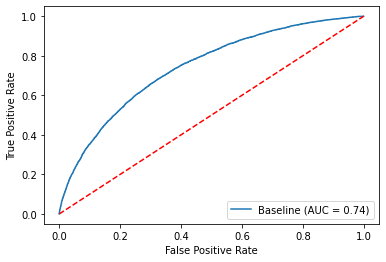

In [21]:
from sklearn.pipeline import Pipeline

# Column preprocessing
numerical_pipeline = Pipeline(steps=[('numerical_imputer', SimpleImputer(strategy="median")),
                                     ('numerical_scaler', StandardScaler())])
low_card_discrete_pipeline = Pipeline(steps=[('low_card_imputer', SimpleImputer(strategy="most_frequent"))])
categorical_pipeline = Pipeline(steps=[('categorical_imputer', SimpleImputer(strategy="most_frequent")),
                                       ('categorical_encoder', OneHotEncoder())])

preprocessor = make_column_transformer((numerical_pipeline, num_cols),
                                       (low_card_discrete_pipeline, low_cols),
                                       (categorical_pipeline, cat_cols))

# Model pipeline
model = Pipeline([('preprocessor', preprocessor),
                  ('classifier', SGDClassifier(loss='log', random_state=0))])

model.fit(X_train, y_train)
y_score = model.predict_proba(X_val)
score = roc_auc_score(y_val, y_score[:,1])
print("ROC score:", score)
plot_roc_curve(model, X_val, y_val, drop_intermediate=False, name="Baseline")
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.show()

It doesn't seem better at all :), maybe faster. Let's use feature_selection technique (Select 150 best features)

ROC score: 0.7417018142972717


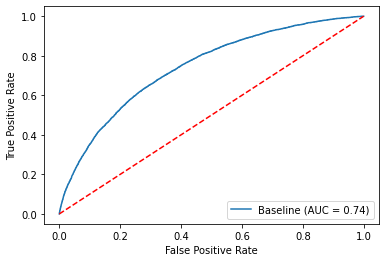

In [22]:
from sklearn.feature_selection import SelectKBest

# Model pipeline
model = Pipeline([('preprocessor', preprocessor),
                  ('feature_selector', SelectKBest(k=50)),
                  ('classifier', SGDClassifier(loss='log', random_state=0))])
model.fit(X_train, y_train)
y_score = model.predict_proba(X_val)
score = roc_auc_score(y_val, y_score[:,1])
print("ROC score:", score)
plot_roc_curve(model, X_val, y_val, drop_intermediate=False, name="Baseline")
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.show()

I ran out of idea, let's try everything. Hope to see instruction..

Use Ordinal Encoder for categorical columns

ROC score: 0.7362177116913146


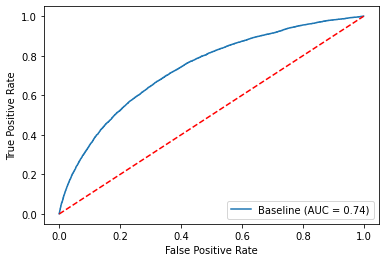

In [23]:
from sklearn.preprocessing import OrdinalEncoder

# Column preprocessing
numerical_pipeline = Pipeline([('numerical_imputer', SimpleImputer(strategy="median")),
                               ('numerical_scaler', StandardScaler())])

low_card_discrete_pipeline = Pipeline([('low_card_imputer', SimpleImputer(strategy="most_frequent"))])

# Change to OrdinalEncoder
categorical_pipeline = Pipeline([('categorical_imputer', SimpleImputer(strategy="most_frequent")),
                                 ('categorical_encoder', OrdinalEncoder())])

preprocessor = make_column_transformer((numerical_pipeline, num_cols),
                                       (low_card_discrete_pipeline, low_cols),
                                       (categorical_pipeline, cat_cols))

# Model pipeline
model = Pipeline([('preprocessor', preprocessor),
                  ('classifier', SGDClassifier(loss='log', random_state=0))])

model.fit(X_train, y_train)
y_score = model.predict_proba(X_val)
score = roc_auc_score(y_val, y_score[:,1])
print("ROC score:", score)
plot_roc_curve(model, X_val, y_val, drop_intermediate=False, name="Baseline")
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.show()

Try RobustScaler with OrdinalEncoder:

ROC score: 0.581286436080475


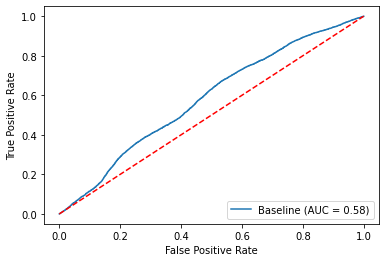

In [24]:
from sklearn.preprocessing import RobustScaler

# Column preprocessing
numerical_pipeline = Pipeline([('numerical_imputer', SimpleImputer(strategy="median")),
                               ('numerical_scaler', RobustScaler())])

low_card_discrete_pipeline = Pipeline([('low_card_imputer', SimpleImputer(strategy="most_frequent"))])

# Change to OrdinalEncoder
categorical_pipeline = Pipeline([('categorical_imputer', SimpleImputer(strategy="most_frequent")),
                                 ('categorical_encoder', OrdinalEncoder())])

preprocessor = make_column_transformer((numerical_pipeline, num_cols),
                                       (low_card_discrete_pipeline, low_cols),
                                       (categorical_pipeline, cat_cols))

# Model pipeline
model = Pipeline([('preprocessor', preprocessor),
                  ('classifier', SGDClassifier(loss='log', random_state=0))])

model.fit(X_train, y_train)
y_score = model.predict_proba(X_val)
score = roc_auc_score(y_val, y_score[:,1])
print("ROC score:", score)
plot_roc_curve(model, X_val, y_val, drop_intermediate=False, name="Baseline")
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.show()

Try RobustScaler with OneHotEncoder:

ROC score: 0.687471896900726


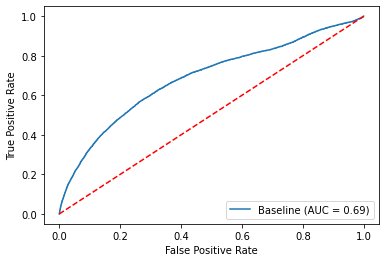

In [25]:
from sklearn.preprocessing import RobustScaler

# Column preprocessing
numerical_pipeline = Pipeline([('numerical_imputer', SimpleImputer(strategy="median")),
                               ('numerical_scaler', RobustScaler())])

low_card_discrete_pipeline = Pipeline([('low_card_imputer', SimpleImputer(strategy="most_frequent"))])

categorical_pipeline = Pipeline([('categorical_imputer', SimpleImputer(strategy="most_frequent")),
                                 ('categorical_encoder', OneHotEncoder())])

preprocessor = make_column_transformer((numerical_pipeline, num_cols),
                                       (low_card_discrete_pipeline, low_cols),
                                       (categorical_pipeline, cat_cols))

# Model pipeline
model = Pipeline([('preprocessor', preprocessor),
                  ('classifier', SGDClassifier(loss='log', random_state=0))])

model.fit(X_train, y_train)
y_score = model.predict_proba(X_val)
score = roc_auc_score(y_val, y_score[:,1])
print("ROC score:", score)
plot_roc_curve(model, X_val, y_val, drop_intermediate=False, name="Baseline")
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.show()

Maybe OneHotEncoder works better in this case than OrdinalEncoder; however, RobustScaler results worse than StandardScaler. Use ANOVA test for numerical_cols and chi2 for categorical_cols after encoding.

ROC score: 0.7355836993473504


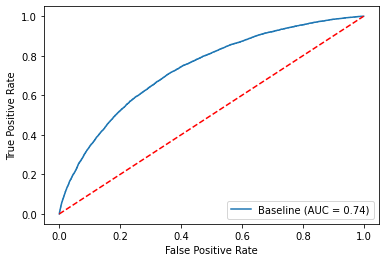

In [26]:
from sklearn.feature_selection import SelectKBest, chi2

# Column preprocessing
numerical_pipeline = Pipeline([('numerical_imputer', SimpleImputer(strategy="median")),
                               ('numerical_scaler', StandardScaler()),
                               ('numerical_selector', SelectKBest(k=10))])

low_card_discrete_pipeline = Pipeline([('low_card_imputer', SimpleImputer(strategy="most_frequent")),
                                       ('low_card_selector', SelectKBest(chi2, k=10))])

categorical_pipeline = Pipeline([('categorical_imputer', SimpleImputer(strategy="most_frequent")),
                                 ('categorical_encoder', OneHotEncoder()),
                                 ('categorical_selector', SelectKBest(chi2, k=10))])

preprocessor = make_column_transformer((numerical_pipeline, num_cols),
                                       (low_card_discrete_pipeline, low_cols),
                                       (categorical_pipeline, cat_cols))

# Model pipeline
model = Pipeline([('preprocessor', preprocessor),
                  ('classifier', SGDClassifier(loss='log', random_state=0))])

model.fit(X_train, y_train)
y_score = model.predict_proba(X_val)
score = roc_auc_score(y_val, y_score[:,1])
print("ROC score:", score)
plot_roc_curve(model, X_val, y_val, drop_intermediate=False, name="Baseline")
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.show()

In [27]:
preds_test = model.predict(df_test)
output_df = pd.DataFrame({"SK_ID_CURR": df_test.index,
                          "TARGET": preds_test})
print(output_df.head())

   SK_ID_CURR  TARGET
0      100001       0
1      100005       0
2      100013       0
3      100028       0
4      100038       0


[My Kaggle submission!!!](https://www.kaggle.com/thanhnguyen2612/ml-dive-week4)